In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4150,2021-02-12,2090.250000,2108.820068,2083.129883,2104.110107,2104.110107,855700
4151,2021-02-16,2104.360107,2152.679932,2104.360107,2121.899902,2121.899902,1132900
4152,2021-02-17,2100.000000,2133.659912,2098.919922,2128.310059,2128.310059,1070100
4153,2021-02-18,2110.389893,2132.735107,2103.709961,2117.199951,2117.199951,1121600
4154,2021-02-19,2119.270020,2130.530029,2097.409912,2101.139893,2101.139893,1457400


In [3]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training1 = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [5]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30298164e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577158e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22151352e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79972283e-02]])

In [6]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train.shape

(3557, 60, 5)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [10]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [11]:
regressor.compile(optimizer='Adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
112/112 [==============================] - 19s 112ms/step - loss: 0.0165
Epoch 2/30
112/112 [==============================] - 15s 132ms/step - loss: 0.0020
Epoch 3/30
112/112 [==============================] - 15s 132ms/step - loss: 0.0026
Epoch 4/30
112/112 [==============================] - 15s 133ms/step - loss: 0.0018
Epoch 5/30
112/112 [==============================] - 16s 139ms/step - loss: 0.0017
Epoch 6/30
112/112 [==============================] - 15s 137ms/step - loss: 0.0019
Epoch 7/30
112/112 [==============================] - 19s 173ms/step - loss: 0.0015
Epoch 8/30
112/112 [==============================] - 16s 141ms/step - loss: 0.0013
Epoch 9/30
112/112 [==============================] - 16s 142ms/step - loss: 0.0014
Epoch 10/30
112/112 [==============================] - 15s 137ms/step - loss: 0.0012
Epoch 11/30
112/112 [==============================] - 15s 134ms/step - loss: 0.0012
Epoch 12/30
112/112 [==============================] - 15s 136ms/step - lo

In [15]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [16]:
past_60_days = data_training1.tail(60)

In [17]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [18]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.02667489],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.0142533 ],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331748],
       ...,
       [1.67862365, 1.70288006, 1.70753107, 1.7057627 , 0.01286963],
       [1.68712887, 1.70212401, 1.71151872, 1.69664493, 0.01349361],
       [1.69439819, 1.70032131, 1.70627401, 1.68346487, 0.01756225]])

In [19]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((538, 60, 5), (538,))

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162615e-08])

In [22]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [23]:
y_pred = y_pred*scale
y_test = y_test*scale

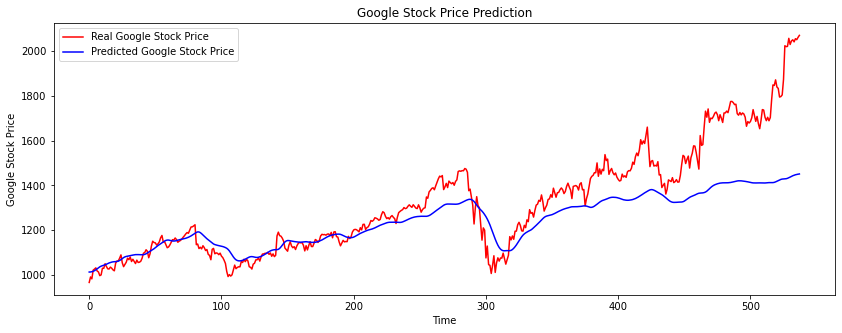

In [25]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig('GoogleStockPrice.png')
plt.show()
